#!/usr/bin/env python<br># coding: utf-8

Author: Bao Cai

Course: Machine Learning for Descriptive Problems

Topic: Graph and Social Network

Start Date: 2020-03-12

Last Save: 2020-03-15

1. Use the abstracts for the Homework 1 or the shopping list from the homework 3.

2. Using three different similarity thresholds (s or N), find the communities using any method. Comments about the results respect to the different thresholds. How it compares with the same analysis using 1-NN?

In [1]:
# Libraries
import itertools
import numpy as np
import pandas as pd
from time import time
from datetime import datetime
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman
from operator import itemgetter
from time import sleep

In [2]:
# Functions
def read_baskets(file, k=2, verbose=True):
    """
    Read a basket file, for each line is a basket.
    
    Parameters:
    ----------
    
    file: str
        Path to file.

    k: int
        Number of max items in a basket.
    
    verbose: boolean
        Choose to report on progress or not.
    
    Returns:
    -------

    basket_of_k: list
        List of baskets of size k.
    """
    with open(file) as f:
        baskets = f.readlines()

    basket_of_k = []
    n = 0
    for basket in baskets:
        items = basket.replace('\n', '').split(',')
        for itemset in itertools.combinations(items, k):
            basket_of_k.append(frozenset(itemset))
        if verbose:
            n += 1
            if n % 100000 == 0:
                print(n, 'baskets processed')
    return basket_of_k

def naive_frequency(baskets):
    """
    Return a dict of frequencies for each basket in given list.
    
    Parameters:
    ----------
    
    baskets: list
        List of baskets.
    
    Returns:
    -------

    basket_frequency: dict
        A frequency corresponds to each basket.
    """
    
    basket_frequency = {}
    for basket in baskets:
        if basket not in basket_frequency:
            basket_frequency[basket] = 0
        basket_frequency[basket] += 1
    return basket_frequency

def frequency_threshold(basket_frequency, s=100):
    """
    Return a dict of set frequencies exceed support threshold.
    
    Parameters:
    ----------
    
    basket_frequency: list
        A frequency corresponds to each basket.
    
    s: int
        Support threshold
    
    Returns:
    -------

    exceed_frequency: dict
        A dict of set frequencies exceed support threshold.
    """
    
    exceed_frequency = {}
    k = len(list(basket_frequency.keys())[0])
    for key, value in basket_frequency.items():
        if value >= s:
            exceed_frequency[key] = value
    print('{} itemsets of size {} with frequency exceed {}'.format(
        len(exceed_frequency), k, s
    ))
    return exceed_frequency

class Node:
    """Node class for the linked list."""

    def __init__(self, value, nxt=None):
        """Initialize the node."""
        self.value = value
        self.next = nxt

def clustering(lst):
    """
    Return a list of clusters.
    
    Parameters:
    ----------
    
    lst: list
        A list of pairs.
    
    Returns:
    -------

    lst_cluster: list
        A list of clusters.
    """
    
    lst_element = []
    lst_head = []
    lst_node = []
    
    i, j = lst[0]
    lst_element = lst_element + [i, j]
    lst_node.append(Node(i))
    lst_head.append(lst_node[-1])
    lst_node.append(Node(j))
    lst_node[-2].next = lst_node[-1]
    n = 1
    
    t1 = time()
    print('Start checking pairs')
    c = 0
    for i, j in lst[1:]:
        if i in lst_element:
            lst_element.append(j)
            lst_node.append(Node(j))
            n += 1
            k = lst_element.index(i)
            lst_node[k].next, lst_node[n].next = lst_node[n], lst_node[k].next
        elif j in lst_element:
            lst_element.append(i)
            lst_node.append(Node(i))
            n += 1
            k = lst_element.index(j)
            lst_node[k].next, lst_node[n].next = lst_node[n], lst_node[k].next
        else:
            lst_element.append(i)
            lst_element.append(j)
            lst_node.append(Node(i))
            lst_head.append(lst_node[-1])
            lst_node.append(Node(j))
            lst_node[-2].next = lst_node[-1]
            n += 2
        c += 1
        if c%100000 == 0:
            print('100000 pairs checked in {} seconds'.format(time() - t1))
    
    lst_cluster = []
    for head in lst_head:
        temp = []
        while head:
            temp.append(head.value)
            head = head.next
        lst_cluster.append(temp)
    return lst_cluster

In [3]:
# global variables
path_data = 'Data/groceries.csv'

In [4]:
baskets = read_baskets(path_data, k=2)

In [5]:
%%time
naive_itemsets = naive_frequency(baskets)
naive_100_threshold = frequency_threshold(naive_itemsets)

207 itemsets of size 2 with frequency exceed 100
CPU times: user 56.5 ms, sys: 2.14 ms, total: 58.6 ms
Wall time: 57.7 ms


In [12]:
%%time
naive_itemsets = naive_frequency(baskets)
naive_100_threshold = frequency_threshold(naive_itemsets)

207 itemsets of size 2 with frequency exceed 100
CPU times: user 54.6 ms, sys: 15 µs, total: 54.6 ms
Wall time: 53.8 ms


In [13]:
%%time
naive_50_threshold = frequency_threshold(naive_itemsets, 50)

605 itemsets of size 2 with frequency exceed 50
CPU times: user 961 µs, sys: 0 ns, total: 961 µs
Wall time: 968 µs


In [14]:
%%time
naive_20_threshold = frequency_threshold(naive_itemsets, 20)

1674 itemsets of size 2 with frequency exceed 20
CPU times: user 1.16 ms, sys: 46 µs, total: 1.21 ms
Wall time: 1.2 ms


In [15]:
%%time
naive_10_threshold = frequency_threshold(naive_itemsets, 10)

2981 itemsets of size 2 with frequency exceed 10
CPU times: user 1.57 ms, sys: 0 ns, total: 1.57 ms
Wall time: 1.61 ms


### Clustering

In [16]:
# 1-NN for s=10
for cluster in clustering(list(naive_10_threshold.keys())):
    print(cluster[:20], end='\n\n')

Start checking pairs
['citrus fruit', 'spices', 'condensed milk', 'red/blush wine', 'mayonnaise', 'soups', 'specialty cheese', 'chewing gum', 'frozen meals', 'dog food', 'seasonal products', 'bottled beer', 'female sanitary products', 'long life bakery product', 'Instant food products', 'cling film/bags', 'grapes', 'sliced cheese', 'specialty bar', 'spread cheese']

['yogurt', 'condensed milk', 'light bulbs', 'other vegetables', 'soups', 'liquor (appetizer)', 'jam', 'beef', 'tropical fruit', 'rolls/buns', 'bottled water', 'coffee', 'butter', 'other vegetables', 'soda', 'whole milk', 'mayonnaise', 'domestic eggs', 'cream cheese', 'fruit/vegetable juice']

['whole milk', 'cooking chocolate', 'pudding powder', 'cocoa drinks', 'popcorn', 'instant coffee', 'nuts/prunes', 'rolls/buns', 'female sanitary products', 'chewing gum', 'liquor (appetizer)', 'ketchup', 'soda', 'domestic eggs', 'yogurt', 'other vegetables', 'sauces', 'hamburger meat', 'other vegetables', 'tropical fruit']

['butter mi

In [17]:
def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)

In [18]:
# %matplotlib inline

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
No handles with labels found to put in legend.


['citrus fruit', 'semi-finished bread', 'margarine', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes', 'newspapers', 'frankfurter', 'domestic eggs', 'oil', 'specialty chocolate', 'butter milk', 'pastry', 'cream cheese', 'pork', 'hamburger meat', 'berries', 'onions', 'whipped/sour cream', 'rice', 'coffee', 'chocolate', 'chicken', 'root vegetables', 'other vegetables', 'pasta', 'detergent', 'beef', 'brown bread', 'UHT-milk', 'processed cheese', 'sausage', 'pip fruit', 'hard cheese', 'sugar', 'canned fruit', 'misc. beverages', 'fruit/vegetable juice', 'hygiene articles', 'white bread', 'rolls/buns', 'dessert', 'candles', 'beverages', 'dish cleaner', 'meat', 'frozen dessert', 'salt', 'canned vegetables', 'canned fish', 'napkins', 'candy', 'soda', 'baking powder', 'waffles', 'frozen fish', 'salty snack', 'shopping bags', 'packaged fruit/vegetables', 'cat food', 'canned beer', 'soft cheese', 'ham', 'frozen vegetables', 'spread cheese', 'mustard',

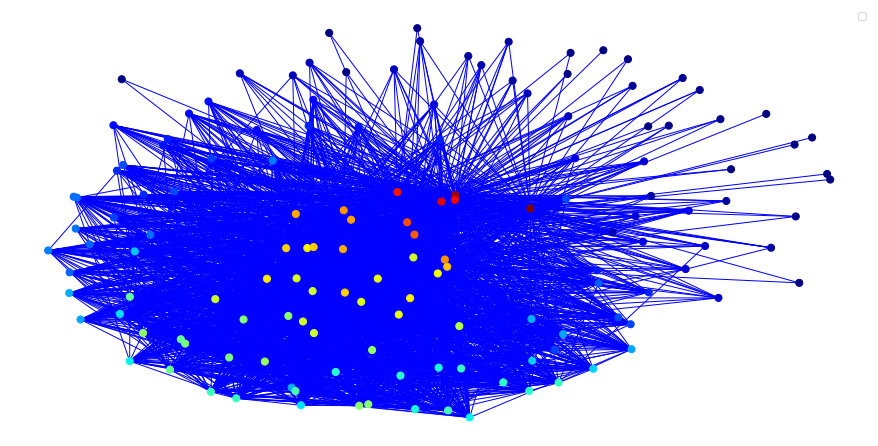

In [19]:
# GN for s=10
matplotlib.rcParams['figure.figsize'] = [12, 6]
G = nx.Graph()
G.add_edges_from(naive_10_threshold)
comp_b = betweenness(G, normalized=False)

# New graph
Gw = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw.add_edge(a[0], a[1], weight=b)

print(list(Gw.nodes))
comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)

# show graph
node_degrees_1 = nx.degree(Gw)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(Gw, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.legend()
plt.show()

For low threshold, naturely, there's a lot of connections and the graph looks a bit crowded. Compare to the 1-NN method above, it depicted clearer the relationship between nodes and not just separated clusters. Also, it explains some overlapping items which appear in most of the baskets.

In [22]:
# 1-NN for s=20
for cluster in clustering(list(naive_20_threshold.keys())):
    print(cluster[:20], end='\n\n')

Start checking pairs
['citrus fruit', 'red/blush wine', 'frozen meals', 'bottled beer', 'long life bakery product', 'grapes', 'sliced cheese', 'specialty bar', 'canned beer', 'cat food', 'waffles', 'baking powder', 'soda', 'candy', 'meat', 'beverages', 'rolls/buns', 'hygiene articles', 'fruit/vegetable juice', 'hard cheese']

['yogurt', 'mayonnaise', 'other vegetables', 'soda', 'rolls/buns', 'instant coffee', 'beef', 'pork', 'chocolate', 'hygiene articles', 'frozen meals', 'frankfurter', 'other vegetables', 'grapes', 'rolls/buns', 'spread cheese', 'other vegetables', 'tropical fruit', 'rolls/buns', 'waffles']

['whole milk', 'house keeping products', 'other vegetables', 'liver loaf', 'popcorn', 'instant coffee', 'jam', 'female sanitary products', 'chewing gum', 'sauces', 'Instant food products', 'cat food', 'mayonnaise', 'cleaner', 'specialty cheese', 'canned beer', 'potted plants', 'soda', 'bottled water', 'citrus fruit']

['butter milk', 'pork', 'chocolate', 'fruit/vegetable juice', 

['citrus fruit', 'semi-finished bread', 'margarine', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes', 'newspapers', 'frankfurter', 'domestic eggs', 'oil', 'specialty chocolate', 'butter milk', 'pastry', 'cream cheese', 'pork', 'hamburger meat', 'berries', 'onions', 'whipped/sour cream', 'coffee', 'chocolate', 'chicken', 'root vegetables', 'other vegetables', 'detergent', 'beef', 'brown bread', 'UHT-milk', 'processed cheese', 'sausage', 'pip fruit', 'hard cheese', 'sugar', 'misc. beverages', 'fruit/vegetable juice', 'hygiene articles', 'white bread', 'rolls/buns', 'dessert', 'beverages', 'meat', 'canned vegetables', 'napkins', 'candy', 'soda', 'baking powder', 'waffles', 'salty snack', 'shopping bags', 'cat food', 'canned beer', 'soft cheese', 'ham', 'frozen vegetables', 'specialty bar', 'pickled vegetables', 'herbs', 'sliced cheese', 'grapes', 'long life bakery product', 'bottled beer', 'potted plants', 'frozen meals', 'red/blush wine', 'c

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


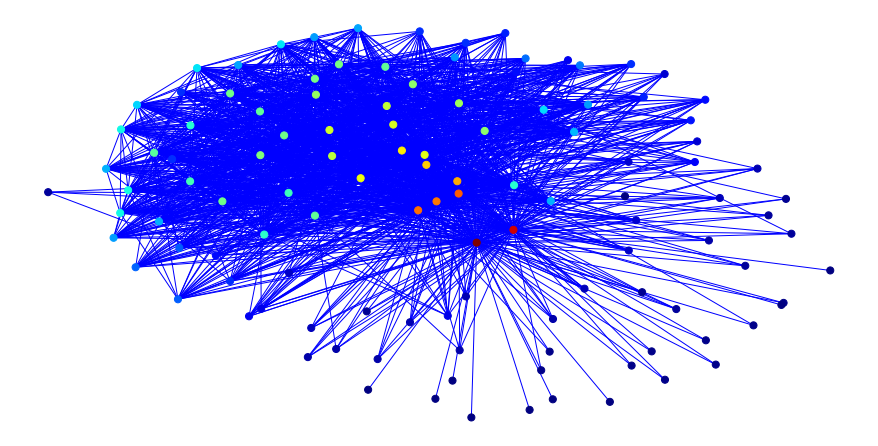

In [23]:
# GN for s=20
matplotlib.rcParams['figure.figsize'] = [12, 6]
G = nx.Graph()
G.add_edges_from(naive_20_threshold)
comp_b = betweenness(G, normalized=False)

# New graph
Gw = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw.add_edge(a[0], a[1], weight=b)

print(list(Gw.nodes))
comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)

# show graph
node_degrees_1 = nx.degree(Gw)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(Gw, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

Pretty much the same since the frequency didn't increase too much

In [27]:
# 1-NN for s=50
for cluster in clustering(list(naive_50_threshold.keys())):
    print(cluster[:20], end='\n\n')

Start checking pairs
['margarine', 'soda', 'bottled beer', 'yogurt', 'whipped/sour cream', 'beef', 'pork', 'sausage', 'frankfurter', 'pastry', 'bottled water', 'rolls/buns', 'whole milk', 'fruit/vegetable juice', 'domestic eggs', 'curd', 'other vegetables', 'tropical fruit', 'citrus fruit', 'bottled beer']

['yogurt', 'beef', 'pork', 'chocolate', 'hygiene articles', 'frozen meals', 'frankfurter', 'other vegetables', 'rolls/buns', 'butter milk', 'tropical fruit', 'other vegetables', 'rolls/buns', 'waffles', 'pastry', 'beverages', 'rolls/buns', 'cream cheese', 'pip fruit', 'newspapers']

['whole milk', 'chewing gum', 'cat food', 'canned beer', 'potted plants', 'pasta', 'chicken', 'meat', 'semi-finished bread', 'mustard', 'frozen meals', 'sliced cheese', 'cake bar', 'baking powder', 'hygiene articles', 'hard cheese', 'cream cheese', 'bottled beer', 'specialty bar', 'fruit/vegetable juice']



['margarine', 'citrus fruit', 'tropical fruit', 'other vegetables', 'curd', 'domestic eggs', 'brown bread', 'fruit/vegetable juice', 'whole milk', 'butter', 'root vegetables', 'frozen vegetables', 'rolls/buns', 'bottled water', 'newspapers', 'pastry', 'shopping bags', 'frankfurter', 'sausage', 'sugar', 'pork', 'beef', 'whipped/sour cream', 'pip fruit', 'yogurt', 'bottled beer', 'soda', 'cream cheese', 'berries', 'onions', 'coffee', 'chocolate', 'chicken', 'hygiene articles', 'napkins', 'beverages', 'waffles', 'candy', 'butter milk', 'dessert', 'soft cheese', 'ham', 'sliced cheese', 'frozen meals', 'white bread', 'hamburger meat', 'oil', 'canned beer', 'long life bakery product', 'salty snack', 'hard cheese', 'meat', 'UHT-milk', 'cat food', 'grapes', 'flour', 'dishes', 'processed cheese', 'pickled vegetables', 'detergent', 'specialty chocolate', 'specialty bar', 'misc. beverages', 'baking powder', 'cake bar', 'mustard', 'herbs', 'semi-finished bread', 'pasta', 'potted plants', 'ice crea

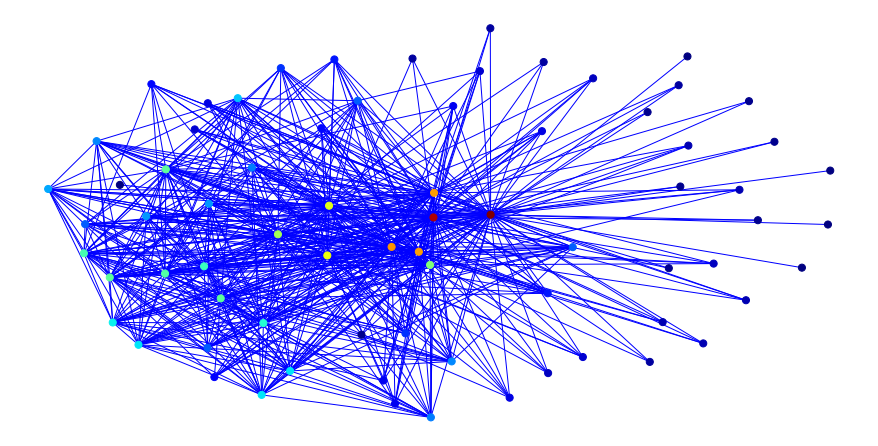

In [25]:
# GN for s=50
matplotlib.rcParams['figure.figsize'] = [12, 6]
G = nx.Graph()
G.add_edges_from(naive_50_threshold)
comp_b = betweenness(G, normalized=False)

# New graph
Gw = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw.add_edge(a[0], a[1], weight=b)

print(list(Gw.nodes))
comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)

# show graph
node_degrees_1 = nx.degree(Gw)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(Gw, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

1-NN clustering start failing since there's too many popular items. The graph looks sparse now since there's not much noise connections now, like 1 time items.

In [28]:
# 1-NN for s=100
for cluster in clustering(list(naive_100_threshold.keys())):
    print(cluster[:20], end='\n\n')

Start checking pairs
['yogurt', 'beef', 'frankfurter', 'other vegetables', 'rolls/buns', 'pastry', 'cream cheese', 'pip fruit', 'pastry', 'soda', 'bottled water', 'root vegetables', 'other vegetables', 'citrus fruit', 'sausage', 'rolls/buns', 'whole milk', 'tropical fruit', 'tropical fruit', 'pastry']

['whole milk', 'chicken', 'sliced cheese', 'hygiene articles', 'cream cheese', 'bottled beer', 'fruit/vegetable juice', 'butter milk', 'other vegetables', 'oil', 'frankfurter', 'chocolate', 'rolls/buns', 'beef', 'ham', 'waffles', 'coffee', 'rolls/buns', 'other vegetables', 'pastry']



['yogurt', 'tropical fruit', 'pip fruit', 'cream cheese', 'whole milk', 'butter', 'citrus fruit', 'curd', 'bottled water', 'root vegetables', 'domestic eggs', 'brown bread', 'pastry', 'soda', 'berries', 'rolls/buns', 'newspapers', 'sausage', 'fruit/vegetable juice', 'napkins', 'shopping bags', 'other vegetables', 'frozen vegetables', 'frankfurter', 'whipped/sour cream', 'margarine', 'beef', 'long life bakery product', 'sugar', 'pork', 'dessert', 'coffee', 'waffles', 'ham', 'salty snack', 'chocolate', 'oil', 'butter milk', 'bottled beer', 'hamburger meat', 'hygiene articles', 'white bread', 'sliced cheese', 'onions', 'chicken', 'canned beer']


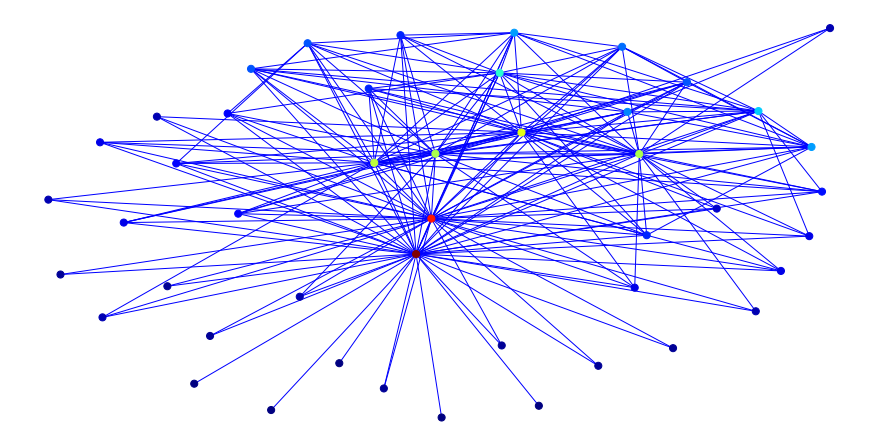

In [29]:
# GN for s=100
matplotlib.rcParams['figure.figsize'] = [12, 6]
G = nx.Graph()
G.add_edges_from(naive_100_threshold)
comp_b = betweenness(G, normalized=False)

# New graph
Gw = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw.add_edge(a[0], a[1], weight=b)

print(list(Gw.nodes))
comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)

# show graph
node_degrees_1 = nx.degree(Gw)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(Gw, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

Now it's actually countable. These must be the very highly desirable items.

To be honest, I still have some more reading to do on this topic, the theory is starting to be too complicated for my knowledge bank. So please pardon this mediocre submission.